In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
data.head()
genderMapping = {'Male': 1, 'Female': 0}

data['Gender'] = data['Gender'].replace(genderMapping)

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [21]:
X = data.drop('Purchased', axis=1)
Y = data['Purchased']

In [22]:
print('Values count is : \n', data['Purchased'].value_counts())

Values count is : 
 0    257
1    143
Name: Purchased, dtype: int64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [25]:
y_pred = model.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy is : {accuracy}')
print(f'Precision is : {precision}')
print(f'Recall is : {recall}')
print(f'F1 score is : {f1score}')


print(f'Classification report is : \n {classification_rep}')
print(f'Confusion matrix is : \n{conf_matrix}')

Accuracy is : 0.925
Precision is : 0.9583333333333334
Recall is : 0.8214285714285714
F1 score is : 0.8846153846153847
Classification report is : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80

Confusion matrix is : 
[[51  1]
 [ 5 23]]


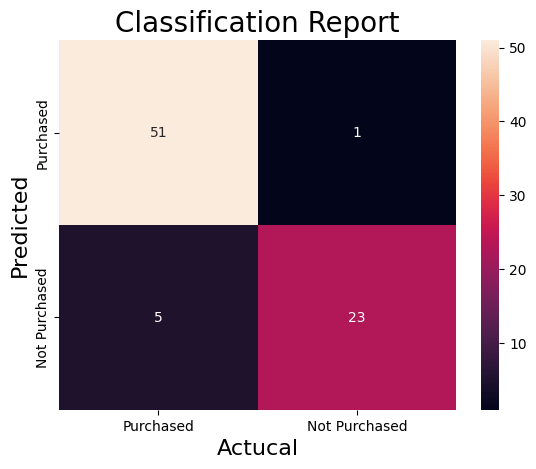

In [30]:
sns.heatmap(conf_matrix,
            fmt='g',
            annot=True,
            xticklabels=['Purchased', 'Not Purchased'],
            yticklabels=['Purchased', 'Not Purchased'])

plt.title('Classification Report', fontsize=20)
plt.xlabel('Actucal', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.show()

In [35]:
# probability prediction

y_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f'FPR is : \n{fpr}')
print(f'TPR is : \n{tpr}')
print(f'ROC AUC : \n{roc_auc}')

FPR is : 
[0.         0.         0.         0.01923077 0.01923077 0.07692308
 0.07692308 0.19230769 0.19230769 1.        ]
TPR is : 
[0.         0.03571429 0.75       0.75       0.85714286 0.85714286
 0.96428571 0.96428571 1.         1.        ]
ROC AUC : 
0.9828296703296704


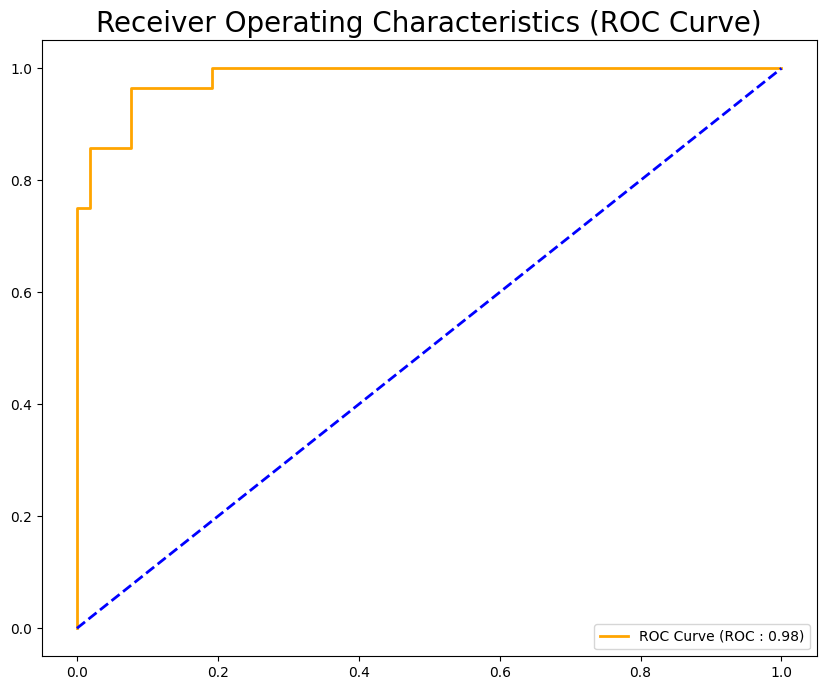

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=2, color = 'orange', label=f'ROC Curve (ROC : {roc_auc:.2f})')
plt.plot([0,1], [0, 1], lw=2, color = 'blue', linestyle='--')
plt.title('Receiver Operating Characteristics (ROC Curve)', fontsize=20)
plt.legend(loc = 'lower right')
plt.show()